## Song Analysis

[Link](https://learn.co/tracks/data-science-bootcamp-prep/data-types/instant-data-science/instant-data-science)

### CodeTask: 
figure out repetitiveness in a hit song *BarbaraAnn*, the most repetitive song of the Beach Boys. 

### Code Structure:
'''
#import libraries 
#import the lyrics 
#parse the lyrics
    #str.split() -> words_list
#count the words occurance 
    #approach 1: pandas.Series.value_counts()
    #approach 2: dict + iteration 
        #a dict to store word counts:(key=unique_words, value=word_count)
        #iterate through words_list
            #for loop
            #or L.count() #%timeit 
#plot the words occurance
    #df.plot(kind='bar')
    #or matplotlib from dict (d.keys(), d.values())
'''   

In [19]:
#raw_lyrics
lyrics = "Ah, Ba Ba Ba Ba Barbara Ann Ba Ba Ba Ba Barbara Ann Oh Barbara Ann Take My Hand Barbara Ann You Got Me Rockin' And A-Rollin' Rockin' And A-Reelin' Barbara Ann Ba Ba Ba Barbara Ann ...More Lyrics... Ba Ba Ba Ba Barbara Ann Ba Ba Ba Ba Barbara Ann"

In [20]:
#parse the lyrics
lyrics = lyrics.replace(",","") #remove punctuation mark","
words_in_lyrics = lyrics.split(' ') #parse on whitespace
print(len(words_in_lyrics)) #check number of words

51


In [21]:
#TO Improve:
#identify and remove other punctuation marks

#### Approach 1: Use Pandas.Series.value_counts()

In [22]:
#import Pandas
import pandas as pd
#import matplotlib.pyplot as plt
#% matplotlib inline

In [23]:
# use series.value_counts(), df has no attribute value_counts()
word_counts = pd.Series(words_in_lyrics).value_counts()
word_counts.head(10)

Ba         19
Barbara     8
Ann         8
And         2
Rockin'     2
My          1
Got         1
...More     1
Take        1
Hand        1
dtype: int64

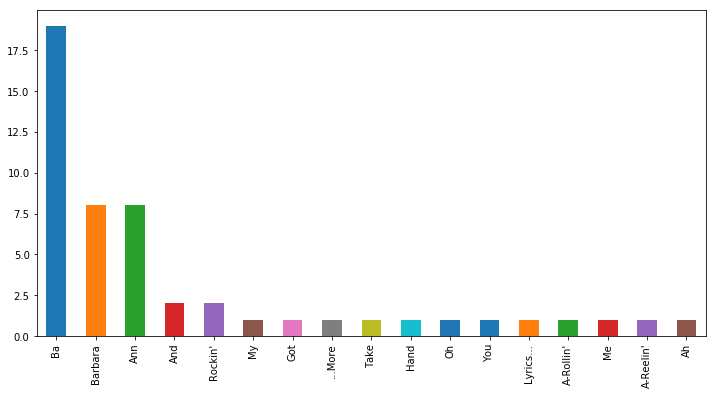

In [25]:
# plot 
word_counts.plot(kind='bar', figsize=(12,6))

In [41]:
# TODO: rotate the xticks, set the yticks (see openAQ)

#### Approach 2, use "for loop  + dict{'word':counts}"

In [27]:
# unique words in the words_in_lyrics
unique_words = set(words_in_lyrics)
# creat dict with unique_words 
word_counts_dict = dict.fromkeys(unique_words,0)
# iterate through words_in_lyrics, update words counts in dict
for word in words_in_lyrics:
    word_counts_dict[word]+=1
word_counts_dict    

{'...More': 1,
 "A-Reelin'": 1,
 "A-Rollin'": 1,
 'Ah': 1,
 'And': 2,
 'Ann': 8,
 'Ba': 19,
 'Barbara': 8,
 'Got': 1,
 'Hand': 1,
 'Lyrics...': 1,
 'Me': 1,
 'My': 1,
 'Oh': 1,
 "Rockin'": 2,
 'Take': 1,
 'You': 1}

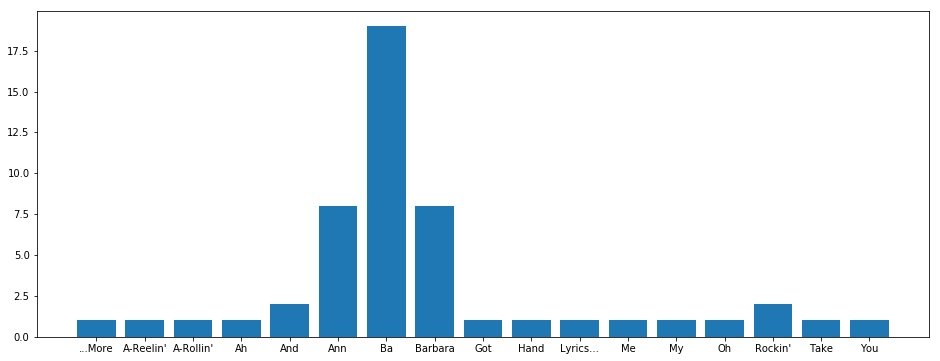

In [40]:
# Plot
fig,ax=plt.subplots(figsize=(16,6))
x = list(word_counts_dict.keys())
y = list(word_counts_dict.values())
ax.bar(x,y)
plt.show()

In [28]:
# may also use 
# L.count() 
# + iteration unique_words 
# + d.update() or d[new_key]=new_value

#### Approach 3: PySpark
- see word_count.py

In [29]:
# import pyspark
# creat spark configuration, spark context
# creat input_rdd from sc
# words_rdd = input_rdd.flatmap(lambda x:x.split(' ')) ##use flatmap since whole file is 1 line
# word_counts = words_rdd.countByValue() #action, key_value rdd:{key=word, value=count}
# clean word (encode 'ascii', decode) one by one using tuple unpacking 
# save it to .py file